In [156]:
#merge data from several states
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [157]:
trainval = pd.read_csv('./data/trainval_set_all.csv')
trainval.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,breed_pop,month,cg_adpt_time
0,39149561,Baby,Male,Large,Labrador Retriever,True,False,False,False,True,IL,High,8,1 - 2 weeks
1,36966271,Baby,Female,Medium,Labrador Retriever,True,True,False,False,True,VT,High,12,< 1 week
2,46191523,Young,Female,Medium,Doberman Pinscher,False,True,False,False,False,NE,Low,11,< 3 months
3,44032457,Young,Male,Medium,Border Collie,True,True,True,False,True,NM,Medium,4,< 3 months
4,32644748,Baby,Male,Large,Hound,True,True,False,False,True,PA,Medium,7,< 1 month


In [159]:
test = pd.read_csv('./data/test_set_all.csv')
test.head()

,id,age,gender,size,breeds.primary,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state,breed_pop,month,cg_adpt_time
0,33130737,Senior,Male,Small,Dachshund,True,True,False,False,True,OR,Medium,9,< 1 month
1,39871883,Adult,Male,Small,Chihuahua,False,True,False,False,True,DE,High,12,< 3 months
2,34690979,Baby,Male,Medium,Golden Retriever,True,True,False,False,True,TX,Low,4,< 1 month
3,45949642,Adult,Male,Large,Pit Bull Terrier,False,False,False,False,False,IN,High,10,< 1 month
4,39896801,Young,Male,Small,Pomeranian,False,True,False,False,True,SC,Low,11,< 1 week


In [160]:
cat_col = ['age','gender','size','breeds.primary','contact.address.state','breed_pop','month','cg_adpt_time']
trainval[cat_col]=trainval[cat_col].astype('category')
test[cat_col]=test[cat_col].astype('category')

In [161]:
# Check for any missing data
print("Table size -", end=' ')
print(trainval.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (trainval.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
#missing_cols = [col for col in extension_data.columns
#                     if extension_train[col].isnull().any()]

Table size - (559857, 14)
Checking for missing values..
Series([], dtype: int64)


In [162]:
#test with small number of features, take off name_pop for now
X_features = ['age', 'gender', 'size', 'breeds.primary', 'breed_pop', 
              'breeds.mixed', 'attributes.house_trained',
             'contact.address.state']
trainval_X = trainval[X_features]
trainval_X.head()

,age,gender,size,breeds.primary,breed_pop,breeds.mixed,attributes.house_trained,contact.address.state
0,Baby,Male,Large,Labrador Retriever,High,True,False,IL
1,Baby,Female,Medium,Labrador Retriever,High,True,False,VT
2,Young,Female,Medium,Doberman Pinscher,Low,False,False,NE
3,Young,Male,Medium,Border Collie,Medium,True,True,NM
4,Baby,Male,Large,Hound,Medium,True,False,PA


In [ ]:
#X_features = ['age', 'gender', 'size', 'breeds.primary', 'name_pop', 'breed_pop', 'month',
#              'breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained',
#              'attributes.special_needs', 'attributes.shots_current', 'contact.address.state']
#trainval_X = trainval[X_features]
#trainval_X.head()

In [163]:
trainval_y = trainval['cg_adpt_time']
trainval_y.head()

0    1 - 2 weeks
1       < 1 week
2     < 3 months
3     < 3 months
4      < 1 month
Name: cg_adpt_time, dtype: category
Categories (5, object): [1 - 2 weeks, < 1 month, < 1 week, < 3 months, > 100 days]

In [164]:
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(trainval_X, trainval_y, test_size=0.2)
print('Training set size = {} and Validation set size = {}'.format(len(train_X),len(val_X)))

Training set size = 447885 and Validation set size = 111972


In [165]:
train_X.head()

,age,gender,size,breeds.primary,breed_pop,breeds.mixed,attributes.house_trained,contact.address.state
80037,Adult,Male,Medium,Terrier,High,False,False,KY
71555,Young,Male,Medium,Basset Hound,Low,True,False,WI
109711,Adult,Female,Large,Labrador Retriever,High,True,True,KS
121814,Young,Male,Large,German Shorthaired Pointer,Low,True,True,AZ
522939,Adult,Male,Small,Lhasa Apso,Low,True,True,IL


In [166]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
cat_col = ['age','gender','size','breeds.primary','breed_pop','contact.address.state']

In [167]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score

In [168]:
train_y.dtypes

CategoricalDtype(categories=['1 - 2 weeks', '< 1 month', '< 1 week', '< 3 months',
                  '> 100 days'],
                 ordered=False)

In [84]:
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)

#precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round((y_pred==val_y).sum()/len(y_pred), 3)))

Fit time: 27.989 / Predict time: 1.184 ---- Accuracy: 0.34


In [58]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)

#precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Fit time: {} / Predict time: {} ---- Accuracy: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round((y_pred==val_y).sum()/len(y_pred), 3)))

Fit time: 6.734 / Predict time: 0.476 ---- Accuracy: 0.32


In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(val_y, y_pred, labels=["< 1 week" , "1 - 2 weeks", "< 1 month", "< 100 days", "> 100 days"])

array([[ 808,  338,  360,  718,  115],
       [ 410,  390,  461,  964,  186],
       [ 363,  378,  715, 1443,  255],
       [ 313,  385,  703, 2358,  562],
       [  94,  155,  246, 1123,  658]], dtype=int64)

In [97]:
(val_y == '1 - 2 weeks').sum()

2411

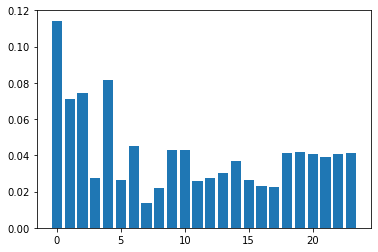

In [60]:
plt.bar(range(len(rf_model.feature_importances_)), rf_model.feature_importances_)
plt.show()

In [98]:
feature_importances = pd.DataFrame(rf_model.feature_importances_,index = OH_train_X.columns,columns=['importance']).sort_values('importance',ascending=False)

In [99]:
feature_importances

,importance
breeds.mixed,0.075601
attributes.house_trained,0.063092
attributes.shots_current,0.047451
attributes.spayed_neutered,0.044599
gender_Male,0.040937
...,...
breeds.primary_Kerry Blue Terrier,0.000012
breeds.primary_Munsterlander,0.000012
breeds.primary_Entlebucher,0.000009
breeds.primary_Afghan Hound,0.000006


In [100]:
import pickle
filename = './models/rfmodel_cg.sav'
pickle.dump(rf_model, open(filename, 'wb'))

In [141]:
from sklearn.pipeline import Pipeline

In [142]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
rf = RandomForestClassifier(n_estimators=150, max_depth=30, n_jobs=-1)
pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])

In [169]:
pipeline_temp.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=False)),
                ('model',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=30, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=150, n_jobs=-1,
                                        oob_score=False, random_state=

In [144]:
y_pred = pipeline_temp.predict(val_X)

In [145]:
round((y_pred==val_y).sum()/len(y_pred), 3)

0.338

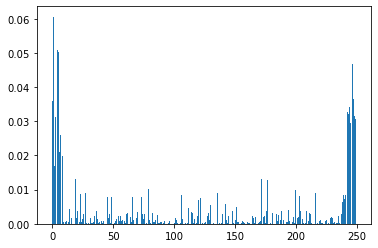

In [149]:
plt.bar(range(len(pipeline_temp['model'].feature_importances_)), pipeline_temp['model'].feature_importances_)
plt.show()

In [151]:
from sklearn.ensemble import GradientBoostingClassifier
oh2 = OneHotEncoder(handle_unknown='ignore', sparse=False)
gb = GradientBoostingClassifier(n_estimators=150, max_depth=30, learning_rate=0.3)
pipeline_temp2 = Pipeline(steps=[('preprocessor', oh2),('model', gb)])

In [152]:
pipeline_temp2.fit(train_X, train_y)

Pipeline(memory=None,
         steps=[('preprocessor',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=False)),
                ('model',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.3, loss='deviance',
                                            max_depth=30, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                   

In [155]:
y_pred2 = pipeline_temp2.predict(val_X)
round((y_pred2==val_y).sum()/len(y_pred), 3)

0.326

In [115]:
a=train_X.iloc[0]

In [116]:
a

age                                                     Baby
gender                                                Female
size                                                  Medium
breeds.primary                American Staffordshire Terrier
name_pop                                                High
breed_pop                                             Medium
breeds.mixed                                            True
attributes.spayed_neutered                              True
attributes.house_trained                                True
attributes.special_needs                               False
attributes.shots_current                                True
contact.address.state                                     MN
Name: 36084, dtype: object

In [118]:
train_X.head()

,age,gender,size,breeds.primary,name_pop,breed_pop,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
36084,Baby,Female,Medium,American Staffordshire Terrier,High,Medium,True,True,True,False,True,MN
24913,Young,Female,Large,Labrador Retriever,Low,High,True,True,True,False,True,TX
57946,Young,Female,Medium,Boxer,Low,Medium,True,True,False,False,True,CA
26656,Young,Female,Medium,American Staffordshire Terrier,Medium,Medium,False,True,True,False,True,NY
55646,Baby,Female,Medium,Labrador Retriever,High,High,True,True,False,False,True,MN


In [128]:
import pickle
filename = './models/rfpipe_cg.pkl'
pickle.dump(pipeline_temp, open(filename, 'wb'))

In [153]:
import pickle
filename = './models/gbpipe_cg.pkl'
pickle.dump(pipeline_temp2, open(filename, 'wb'))

In [ ]:
rf = RandomForestClassifier()
param = {'n_estimators': [10, 150, 300],
        'max_depth': [30, 60, 90, None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(OH_train_X, train_y)
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
#pipeline_1 = Pipeline(steps=[('model', RandomForestRegressor(random_state=0))])
#pipeline_2 = Pipeline(steps=[('model', DecisionTreeRegressor(random_state=0))])
#pipeline_3 = Pipeline(steps=[('model', XGBRegressor(random_state=0))])

In [ ]:
#next few cells are just testing

In [ ]:
#testing out encoders

In [9]:
train_X.head()

,age,gender,size,name_pop,breed_pop,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.special_needs,attributes.shots_current,contact.address.state
8969,Baby,Female,Medium,Low,High,True,True,False,False,True,NY
16555,Adult,Male,Medium,Low,Medium,False,True,False,False,True,TX
58815,Adult,Female,Medium,High,Low,True,False,False,False,False,CA
23874,Adult,Male,Small,High,Medium,True,True,False,False,True,NY
17596,Young,Male,Large,High,Low,True,True,True,False,True,CA


In [12]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(OH_encoder.transform(val_X[cat_col]))

In [13]:
# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [42]:
rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
rf_model = rf.fit(OH_train_X, train_y)
y_pred = rf_model.predict(OH_val_X)
mae_x=mean_absolute_error(val_y, y_pred)
mae_x

198.06307707707575

In [12]:
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
rf = RandomForestRegressor(n_estimators=10, max_depth=5, n_jobs=-1)
pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
print('Est: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

Est: 10 / Depth: 10 ---- MAE: 196.655


In [ ]:
#main code starts here

In [11]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [27]:
def train_RF(n_est, depth):
    rf = RandomForestRegressor(n_estimators=n_est, max_depth=depth, n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    #scores= -1 * cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='neg_mean_absolute_error')
    r2s= cross_val_score(pipeline_temp, train_X, train_y,cv=5,scoring='r2')
    #print('Est: {} / Depth: {} ---- MAE: {} R^2: {}'.format(n_est,depth,round(scores.mean(), 3),round(r2s.mean(), 3)))
    print('Est: {} / Depth: {} ---- R^2: {}'.format(n_est,depth,round(r2s.mean(), 3)))

In [28]:
for n_est in [10, 50, 100]:
    for depth in [10, 50, 100]:
        train_RF(n_est, depth)

Est: 10 / Depth: 10 ---- R^2: 0.098
Est: 10 / Depth: 50 ---- R^2: 0.087
Est: 10 / Depth: 100 ---- R^2: 0.087
Est: 50 / Depth: 10 ---- R^2: 0.098
Est: 50 / Depth: 50 ---- R^2: 0.088
Est: 50 / Depth: 100 ---- R^2: 0.089
Est: 100 / Depth: 10 ---- R^2: 0.099
Est: 100 / Depth: 50 ---- R^2: 0.089
Est: 100 / Depth: 100 ---- R^2: 0.089


In [19]:
def train_DT(n_est, depth):
    rf = DecisionTreeRegressor(min_samples_split=mss, max_depth=depth,n_jobs=-1)
    pipeline_temp = Pipeline(steps=[('preprocessor', oh),('model', rf)])
    scores= -1 * cross_val_score(pipeline_temp, trainval_X, trainval_y,cv=5,scoring='neg_mean_absolute_error')
    print('MSS: {} / Depth: {} ---- MAE: {}'.format(n_est,depth,round(scores.mean(), 3)))

In [20]:
for mss in [2, 5, 10]:
    for depth in [10, 50, 100]:
        train_DT(mss, depth)

Est: 2 / Depth: 10 ---- MAE: 95.435
Est: 2 / Depth: 50 ---- MAE: 95.535
Est: 2 / Depth: 100 ---- MAE: 95.539
Est: 5 / Depth: 10 ---- MAE: 95.436
Est: 5 / Depth: 50 ---- MAE: 95.508
Est: 5 / Depth: 100 ---- MAE: 95.504
Est: 10 / Depth: 10 ---- MAE: 95.413
Est: 10 / Depth: 50 ---- MAE: 95.44
Est: 10 / Depth: 100 ---- MAE: 95.441


In [ ]:
#model validation

In [12]:
import time
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(oh.fit_transform(train_X[cat_col]))
OH_cols_val = pd.DataFrame(oh.transform(val_X[cat_col]))
OH_cols_train.index = train_X.index
OH_cols_val.index = val_X.index
rest_train = train_X.drop(cat_col, axis=1)
rest_val = val_X.drop(cat_col, axis=1)
OH_train_X = pd.concat([rest_train, OH_cols_train], axis=1)
OH_val_X = pd.concat([rest_val, OH_cols_val], axis=1)

In [20]:
def train_GB(est, max_depth, lr):
    gb = XGBRegressor(n_estimators=est, max_depth=max_depth, learning_rate=lr, n_jobs=-1)
    gb_model = gb.fit(OH_train_X, train_y)
    y_pred = gb_model.predict(OH_val_X)
    r2 =r2_score(val_y,y_pred)
    print('Est: {} / Depth: {} / Learning Rate: {} ---- R^2: {}'.format(n_est,max_depth,lr,round(r2, 3)))

In [21]:
for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 3 / Learning Rate: 0.01 ---- R^2: -1.973


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 3 / Learning Rate: 0.1 ---- R^2: 0.081


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:21] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 3 / Learning Rate: 1 ---- R^2: 0.086


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 7 / Learning Rate: 0.01 ---- R^2: -1.962


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 7 / Learning Rate: 0.1 ---- R^2: 0.088


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 7 / Learning Rate: 1 ---- R^2: 0.079
[21:28:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Est: 50 / Depth: 11 / Learning Rate: 0.01 ---- R^2: -1.961


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 11 / Learning Rate: 0.1 ---- R^2: 0.082


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 11 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:28:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 15 / Learning Rate: 0.01 ---- R^2: -1.961


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:05] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 15 / Learning Rate: 0.1 ---- R^2: 0.08


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 50 / Depth: 15 / Learning Rate: 1 ---- R^2: 0.077
[21:29:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


Est: 100 / Depth: 3 / Learning Rate: 0.01 ---- R^2: -0.668


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 3 / Learning Rate: 0.1 ---- R^2: 0.083


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:27] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 3 / Learning Rate: 1 ---- R^2: 0.087


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 7 / Learning Rate: 0.01 ---- R^2: -0.653


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 7 / Learning Rate: 0.1 ---- R^2: 0.086


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:29:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 7 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 11 / Learning Rate: 0.01 ---- R^2: -0.653


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 11 / Learning Rate: 0.1 ---- R^2: 0.078
[21:30:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Est: 100 / Depth: 11 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 15 / Learning Rate: 0.01 ---- R^2: -0.653


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:30:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 15 / Learning Rate: 0.1 ---- R^2: 0.078


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 100 / Depth: 15 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 3 / Learning Rate: 0.01 ---- R^2: -0.193
[21:31:17] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



Est: 150 / Depth: 3 / Learning Rate: 0.1 ---- R^2: 0.085


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 3 / Learning Rate: 1 ---- R^2: 0.087


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 7 / Learning Rate: 0.01 ---- R^2: -0.177


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:43] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 7 / Learning Rate: 0.1 ---- R^2: 0.085


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:31:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 7 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 11 / Learning Rate: 0.01 ---- R^2: -0.178


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 11 / Learning Rate: 0.1 ---- R^2: 0.078


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:50] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 11 / Learning Rate: 1 ---- R^2: 0.077


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:32:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 15 / Learning Rate: 0.01 ---- R^2: -0.178


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:33:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 15 / Learning Rate: 0.1 ---- R^2: 0.078


C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[21:33:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Est: 150 / Depth: 15 / Learning Rate: 1 ---- R^2: 0.077


In [24]:
from xgboost import XGBRegressor
gb = XGBRegressor(n_estimators=150, max_depth=7, learning_rate=0.1, n_jobs=-1)

start = time.time()
gb_model = gb.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

C:\anaconda_python\envs\Insight\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:24:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit time: 55.172 / Predict time: 0.747 ---- MAE: 0.248 / R^2: 0.174


In [33]:
from xgboost import XGBRegressor
xg = XGBRegressor(n_estimators=100, max_depth=10, n_jobs=-1)

start = time.time()
xg_model = xg.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = xg_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

C:\anaconda_python\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:44:38] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Fit time: 13.329 / Predict time: 0.161 ---- MAE: 0.863 / R^2: 0.088


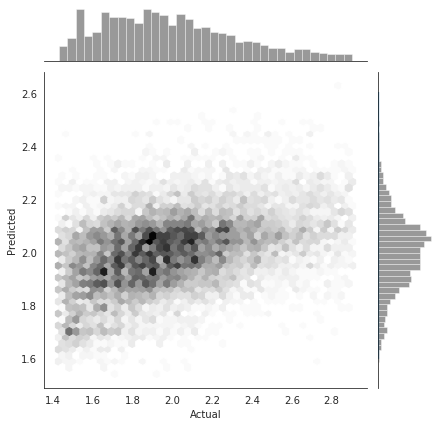

In [31]:
import seaborn as sns
with sns.axes_style("white"):
    ax = sns.jointplot(x=val_y, y=y_pred, kind="hex", color="k");
    ax.set_axis_labels('Actual','Predicted')
plt.plot([1.6, 2.6], [1.6, 2.6], linewidth=2)
    #ax.set_ylabel('Predicted')
    #ax.set(xlim=(1.4,2.8))
    #ax.set(ylim=(1.4,2.8))

In [59]:
#import pickle
#filename = 'finalized_model_demo.sav'
#pickle.dump(model, open(filename, 'wb'))

#filename = 'finalized_model_demo.sav'
#loaded_model = pickle.load(open(filename, 'rb'))
#test pickle
#from sklearn.metrics import mean_absolute_error
#extension_preds = loaded_model.predict(test_X)
#mae_x=mean_absolute_error(test_y, extension_preds)
#print('The mean absolute error is {} which is about {:.2%} of the mean extension'.format(mae_x,(mae_x/mean_x_total)))

NameError: name 'scores' is not defined

In [34]:
import pickle
filename = './models/xgmodel_A2.sav'
pickle.dump(gb_model, open(filename, 'wb'))

In [37]:
a=OH_train_X.iloc[0]

In [38]:
a

breeds.mixed                  True
attributes.spayed_neutered    True
attributes.house_trained      True
attributes.shots_current      True
0                                0
1                                1
2                                0
3                                0
4                                0
5                                1
6                                0
7                                0
8                                1
9                                0
10                               1
11                               0
12                               0
13                               0
Name: 2223, dtype: object

In [47]:
xnew = [[True, True, True, True, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0]]

In [50]:
d = pd.DataFrame(xnew, columns=['breeds.mixed', 'attributes.spayed_neutered', 'attributes.house_trained', 'attributes.shots_current', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13'])

In [51]:
d

,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,True,True,True,True,0,1,0,0,0,1,0,0,1,0,1,0,0,0


In [53]:
np.exp(gb_model.predict(d))

array([30.07968], dtype=float32)

In [54]:
d['10'] = 0
d['11'] = 1
d

,breeds.mixed,attributes.spayed_neutered,attributes.house_trained,attributes.shots_current,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,True,True,True,True,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [55]:
np.exp(gb_model.predict(d))

array([19.768171], dtype=float32)

In [56]:
d['11'] = 0
d['12'] = 1
np.exp(gb_model.predict(d))

array([21.004389], dtype=float32)

In [57]:
d['12'] = 0
d['13'] = 1
np.exp(gb_model.predict(d))

array([31.470345], dtype=float32)

In [44]:
#Linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

start = time.time()
lr_model = lr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = lr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 0.243 / Predict time: 0.028 ---- MAE: 0.876 / R^2: 0.069


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()
params = {'alpha': [0.001, 0.01, 0.1, 1, 5, 10]}
ridge_regressor = GridSearchCV(ridge, params, scoring='r2', cv=5)
ridge_regressor.fit(OH_train_X, train_y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 10}
0.06972839584829206


In [49]:
from sklearn.linear_model import Lasso
lasso = Lasso()
params = {'alpha': [1e-10, 1e-5, 1e-3, 1, 10, 30]}
lasso_regressor = GridSearchCV(lasso, params, scoring='r2', cv=5)
lasso_regressor.fit(OH_train_X, train_y)
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterati

{'alpha': 10}
0.06972839584829206


C:\anaconda_python\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [50]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-05}
0.06973029023361599


In [ ]:
#Lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso()

start = time.time()
lr_model = lr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = lr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

In [57]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [60]:
from sklearn.linear_model import RidgeCV
rcv = RidgeCV(alphas=alphas, scoring='r2', normalize=True)
rcv.fit(OH_train_X, train_y)
rcv.alpha_

0.005

In [63]:
ridgemodel = Ridge(alpha = rcv.alpha_, normalize = True)
ridgemodel.fit(OH_train_X, train_y)
y_pred = ridgemodel.predict(OH_val_X)
r2 =r2_score(val_y,y_pred)
r2

0.06922171956313983

In [64]:
pd.Series(ridgemodel.coef_, index = OH_val_X.columns)

breeds.mixed                  0.011778
breeds.unknown                0.000000
attributes.spayed_neutered    0.044283
attributes.house_trained      0.238269
attributes.special_needs      0.432499
attributes.shots_current      0.099156
0                             0.169981
1                            -0.276809
2                             0.352069
3                             0.083693
4                             0.001179
5                            -0.001202
6                             0.027061
7                            -0.074519
8                             0.113026
9                             0.050514
10                           -0.120750
11                           -0.109579
12                            0.034705
13                            0.005263
14                            0.065023
dtype: float64

In [66]:
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas=alphas, max_iter=100000, normalize=True)
lcv.fit(OH_train_X, train_y)
lcv.alpha_

C:\anaconda_python\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


5000000000.0

In [70]:
lmodel = Lasso(alpha = 0.005, max_iter=100000, normalize = True)
lmodel.fit(OH_train_X, train_y)
y_pred = lmodel.predict(OH_val_X)
r2 =r2_score(val_y,y_pred)
r2

-0.00012802684020307709

In [72]:
len(train_y)

98217

In [51]:
#Ridge regression
from sklearn.linear_model import Ridge
rr = Ridge()

start = time.time()
rr_model = rr.fit(OH_train_X, train_y)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rr_model.predict(OH_val_X)
end = time.time()
pred_time = (end - start)
mae_x=mean_absolute_error(val_y, y_pred)
r2 =r2_score(val_y,y_pred)
print('Fit time: {} / Predict time: {} ---- MAE: {} / R^2: {}'.format(
    round(fit_time, 3), round(pred_time, 3), round(mae_x, 3), round(r2,3)))

Fit time: 0.158 / Predict time: 0.029 ---- MAE: 0.876 / R^2: 0.069
